<a href="https://colab.research.google.com/github/CT-6282/COVID-19_Paper/blob/master/graficas_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
sns.set(color_codes=True)
import os, datetime
from collections import Counter
from matplotlib.offsetbox import AnchoredText

# Se importa el csv y filtra solo positivos

In [38]:
os.getcwd() #ahi se guarda el csv

'/content'

In [39]:
df = pd.read_csv("covid_data.csv.zip")
print("Dimensiones del df: ", df.shape)

Dimensiones del df:  (861851, 31)


In [40]:
#se crea la carpeta "plots" para almecenar las grficas generadas
try:
    os.makedirs("plots")
except FileExistsError:
    pass

In [41]:
#SOLO CASOS POSITIVOS COVID
df = df[df.RESULTADO == 1]
df.drop(['RESULTADO'], axis=1, inplace = True)
print("Dimensiones del df: ", df.shape)
#lista de columnas
list(df)

Dimensiones del df:  (362274, 30)


['ENTIDAD_UM',
 'SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'UCI',
 'DIAS_DIF_HOSP',
 'BOOL_DEF',
 'DIAS_DIF_DEF']

# Gráficas

In [42]:
#funcion para agregar las fechas
def plot_date(ax):
    txtbox = ax.text(0.0, 0.975, datetime.datetime.now().strftime('%b %d, %Y'), transform=ax.transAxes, fontsize=7,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='w',alpha=0.5)) 
    txtbox.set_x(1.0-(txtbox.figure.bbox.bounds[2]-(txtbox.clipbox.bounds[2]-txtbox.clipbox.bounds[0]))/txtbox.figure.bbox.bounds[2])


Entidades de residencia con caso de covid:
 9     65214
15    47989
27    18351
30    17610
21    16959
Name: ENTIDAD_RES, dtype: int64


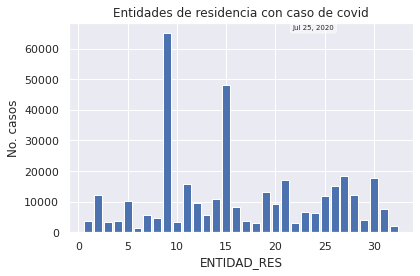

In [43]:
def grafica1():
    fig, ax = plt.subplots() 
    ax.bar((df['ENTIDAD_RES'].value_counts()).index, (df['ENTIDAD_RES'].value_counts()).values) 
    ax.set_title('Entidades de residencia con caso de covid') 
    ax.set_xlabel('ENTIDAD_RES') 
    ax.set_ylabel('No. casos')
    plot_date(ax)
    fig.tight_layout()
    plt.savefig('plots/entidades_casos_pos.png', format='png', dpi=1200)
    #plt.close(fig)
grafica1()
print("Entidades de residencia con caso de covid:\n", df['ENTIDAD_RES'].value_counts().head())


Pacientes con covid ambulatorios o hospitalizados:
 0    259982
1    102292
Name: TIPO_PACIENTE, dtype: int64


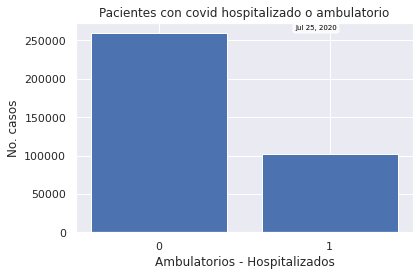

In [44]:
def grafica3():
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['TIPO_PACIENTE'].value_counts()).index, (df['TIPO_PACIENTE'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizado o ambulatorio') 
    ax.set_xlabel('Ambulatorios - Hospitalizados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['TIPO_PACIENTE'].value_counts()).index)
    plot_date(ax)
    fig.tight_layout()
    plt.savefig('plots/amb_hosp_casos_pos.png', format='png', dpi=1200)
    #plt.close(fig)
grafica3()
print("Pacientes con covid ambulatorios o hospitalizados:\n", df['TIPO_PACIENTE'].value_counts().head())


Pacientes Hospitalizados Intubados:
 0    92389
1     9903
Name: INTUBADO, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Porcentaje de pacientes hospitalizados e intubados:  2.8103901853444238


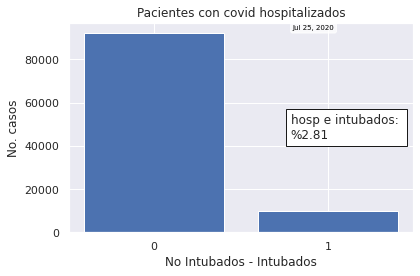

In [45]:
def grafica4():
    df['TIPO_PACIENTE'].value_counts()
    df_aux = df.loc[df.TIPO_PACIENTE == 1]
    df_aux.drop(['TIPO_PACIENTE'], axis=1, inplace = True)
    print("Pacientes Hospitalizados Intubados:\n", df_aux['INTUBADO'].value_counts())
    print("Porcentaje de pacientes hospitalizados e intubados: ",((df['INTUBADO'].value_counts()).values[1]/(df['INTUBADO'].value_counts()).values[0])*100)
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df_aux['INTUBADO'].value_counts()).index, (df_aux['INTUBADO'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizados') 
    ax.set_xlabel('No Intubados - Intubados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df_aux['INTUBADO'].value_counts()).index)
    texto="hosp e intubados: \n%"+str(round(((df['INTUBADO'].value_counts()).values[1]/(df['INTUBADO'].value_counts()).values[0])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
    plt.savefig('plots/hosp_intubados_pos.png', format='png', dpi=1200)
    #plt.close(fig)
grafica4()

Casos con covid fallecidos:
 0    321084
1     41190
Name: BOOL_DEF, dtype: int64
Porcentaje de mortalidad:  12.828418731546885


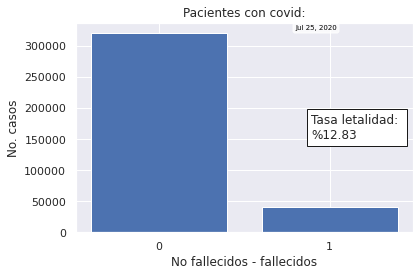

In [46]:
def grafica5():
    print("Casos con covid fallecidos:\n", df['BOOL_DEF'].value_counts())
    print("Porcentaje de mortalidad: ",((df['BOOL_DEF'].value_counts()).values[1]/(df['BOOL_DEF'].value_counts()).values[0])*100)
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['BOOL_DEF'].value_counts()).index, (df['BOOL_DEF'].value_counts()).values) 
    ax.set_title('Pacientes con covid:') 
    ax.set_xlabel('No fallecidos - fallecidos') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['BOOL_DEF'].value_counts()).index)
    texto="Tasa letalidad: \n%"+str(round(((df['BOOL_DEF'].value_counts()).values[1]/(df['BOOL_DEF'].value_counts()).values[0])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
    plt.savefig('plots/def_pos.png', format='png', dpi=1200)
    #plt.close(fig)
grafica5()


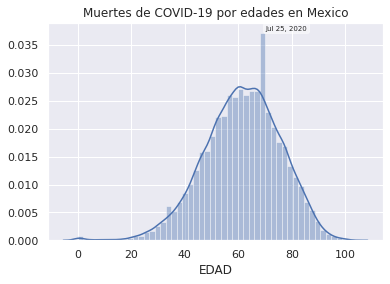

In [47]:
def grafica6():
    fig, ax = plt.subplots()
    plot_date(ax)
    df_solodef = df.loc[df.BOOL_DEF == 1]
    sns.distplot(df_solodef['EDAD']).set_title("Muertes de COVID-19 por edades en Mexico")  
    plt.savefig('plots/def_edad_histograma.png', format='png', dpi=1200)
    #plt.close(fig)
grafica6()

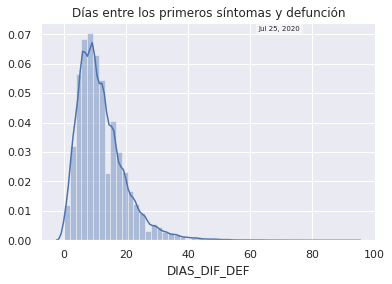

In [48]:
def grafica7():
    fig, ax = plt.subplots()
    plot_date(ax)
    df_solodef = df.loc[df.BOOL_DEF == 1]
    sns.distplot(df_solodef['DIAS_DIF_DEF']).set_title("Días entre los primeros síntomas y defunción")      
    #plt.close(fig)
grafica7()

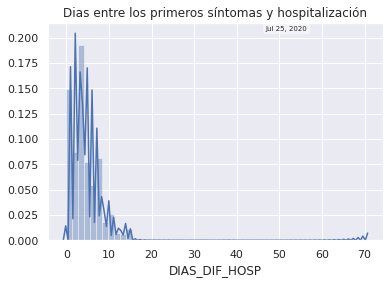

In [49]:
def grafica8():
    fig, ax = plt.subplots()
    plot_date(ax)
    sns.distplot(df['DIAS_DIF_HOSP']).set_title("Dias entre los primeros síntomas y hospitalización")      
    #plt.close(fig)
grafica8()

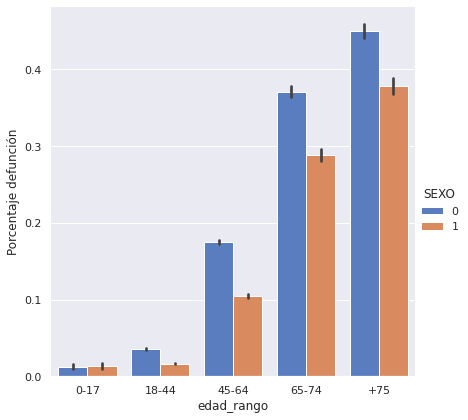

In [53]:
def grafica9():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="BOOL_DEF", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted", legend=True)
    g.despine(left=True)
    g.set_ylabels("Porcentaje defunción")
    plt.savefig('plots/barplot_defuncion_edad.png', format='png', dpi=1200)
    plt.close(fig)
grafica9()

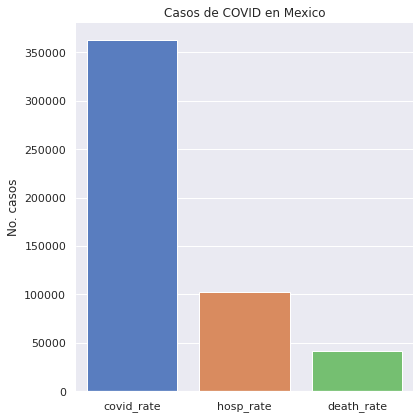

In [54]:
def grafica99():
    x= ['covid_rate', 'hosp_rate', 'death_rate']
    y = [len(df), len((df[df.TIPO_PACIENTE == 1])), len((df[df.BOOL_DEF == 1]))]
    fig, ax = plt.subplots()
    g = sns.catplot(x=x, y=y, data=df, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("No. casos")
    plt.title("Casos de COVID en Mexico")
    plt.xlabel(None)
    plt.savefig('plots/barplot_casos_hos_def.png', format='png', dpi=1200)
    plt.close(fig)
grafica99()

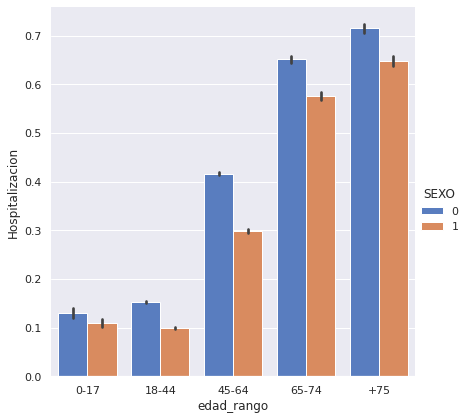

In [55]:
def grafica10():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="TIPO_PACIENTE", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Hospitalización")
    plt.savefig('plots/barplot_hospitalizacion_edad.png', format='png', dpi=1200)
    plt.close(fig)
grafica10()

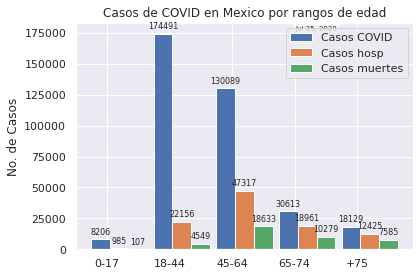

In [57]:
def grafica11():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]]))
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
    plt.savefig("plots/Casos de COVID en Mexico por rangos de edad.png", format='png', dpi=1200)
    #plt.close(fig)
grafica11()

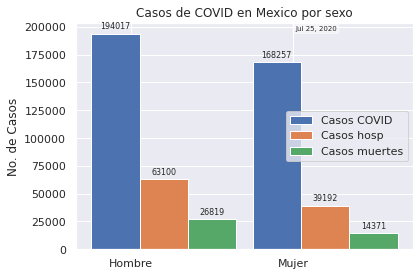

In [59]:
def grafica12():
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.SEXO == i]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc="center right")
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
    plt.savefig("plots/Casos de COVID en Mexico por sexo.png", format='png', dpi=1200)
    #plt.close(fig)
grafica12()

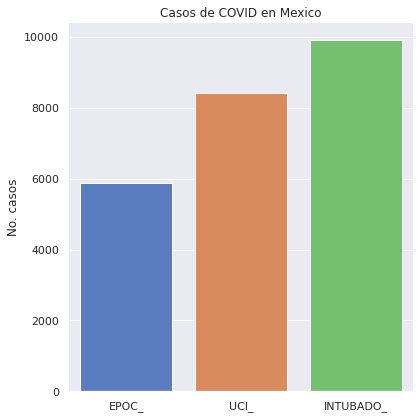

In [66]:
def grafica13():
    x= ['EPOC_', 'UCI_', 'INTUBADO_']
    y = [len((df[df.EPOC == 1])), len((df[df.UCI == 1])),len((df[df.INTUBADO == 1]))]
    #fig, ax = plt.subplots()
    g = sns.catplot(x=x, y=y, data=df, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("No. casos")
    plt.title("Casos de COVID en Mexico")
    plt.xlabel(None)
    #plot_date(ax)
    plt.savefig('plots/barplot_casos_hos_def.png', format='png', dpi=1200)
    #plt.close(fig)
grafica13()

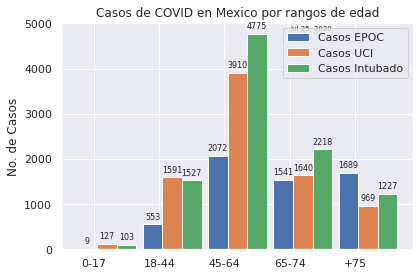

In [67]:
def grafica14():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    EPOC_rate, UCI_rate, INTUBADO_rate = [],[], []
    for i in range(len(labels)):
        EPOC_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.EPOC == 1)]))
        UCI_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.UCI == 1)]))
        INTUBADO_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, EPOC_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), UCI_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), INTUBADO_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
    plt.savefig("plots/Casos de COVID hospitalarios en Mexico por rangos de edad.png", format='png', dpi=1200)
    #plt.close(fig)
grafica14()

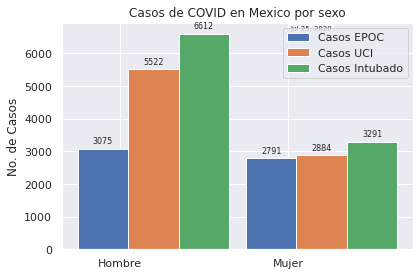

In [68]:
def grafica15():
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[(df.SEXO == i) & (df.EPOC == 1)]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.UCI == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
    plt.savefig("plots/Casos de COVID hospitalarios en Mexico por sexo.png", format='png', dpi=1200)
    #plt.close(fig)
grafica15()

,casos,poly
2020-01-13,0.0,0.000000
2020-01-14,0.0,0.000000
2020-01-15,0.0,0.000000
2020-01-16,0.0,0.000000
2020-01-17,0.0,0.000000
...,...,...
2020-07-17,230.0,295.382739
2020-07-18,61.0,255.724121
2020-07-19,17.0,214.809863
2020-07-20,32.0,172.621731


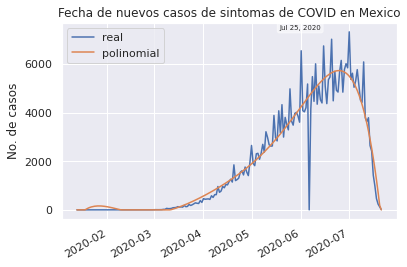

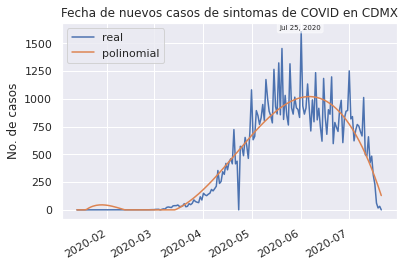

In [71]:
def casos_nuevos_indiv(titulo, columna_fecha, npol, estado):
    if estado != False:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == False:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha])
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    #poly fit
    xaxis = range(len(fechas_total.index))
    coefficients = np.polyfit(xaxis,fechas_total['casos'],npol)
    y_poly = np.poly1d(coefficients)(xaxis).clip(min=0) 
    fechas_total['poly'] = y_poly
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    plt.plot(fechas_total.index,fechas_total['casos'], label="real")
    plt.plot(fechas_total.index,y_poly, label="polinomial")
    plt.title(titulo)
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.savefig('plots/'+titulo+'.png', format='png', dpi=1200)
    #plt.close(fig)
    return fechas_total
casos_nuevos_indiv(titulo="Fecha de nuevos casos de sintomas de COVID en Mexico",columna_fecha='FECHA_SINTOMAS',npol=6, estado=False)
casos_nuevos_indiv(titulo="Fecha de nuevos casos de sintomas de COVID en CDMX",columna_fecha='FECHA_SINTOMAS',npol=6, estado=9)

Se manda a llamar la funcion "casos_nuevos_indiv" con los 3 tipos de fechas para juntarlas en una sola gráfica

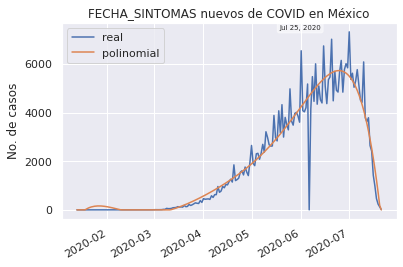

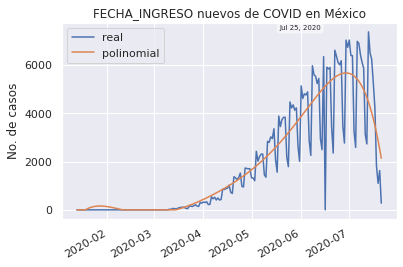

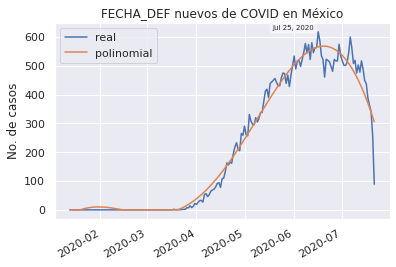

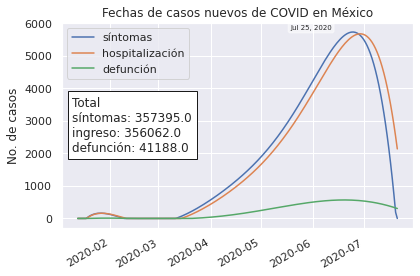

In [73]:
def casos_nuevos_total(estado, npol, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_nuevos_indiv(titulo= str(word)+" nuevos de COVID en "+str(estado_str),columna_fecha=str(word),npol=npol, estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las 3 columnas polinomios de fechas en df_fechas_mex
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,1], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[:,0].sum()) #guardar el total de las columnas fechas
    #plot
    fig, ax = plt.subplots()
    texto="Total\nsíntomas: "+str(total_fechas[0])+"\ningreso: "+str(total_fechas[1])+"\ndefunción: "+str(total_fechas[2])
    anchored_text = AnchoredText(texto, loc="center left")
    ax.add_artist(anchored_text)
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos nuevos de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots/Fecha de nuevos casos de COVID en "+str(estado_str)+'.png', format='png', dpi=1200)
    #plt.close(fig)
casos_nuevos_total(estado=False, npol=6, estado_str='México')
#casos_nuevos_total(estado=9, npol=6, estado_str='CDMX')
#casos_nuevos_total(estado=14, npol=10, estado_str='Jalisco')
#casos_nuevos_total(estado=22, npol=6, estado_str='Querétaro')


,casos
2020-01-13,0.0
2020-01-14,0.0
2020-01-15,0.0
2020-01-16,0.0
2020-01-17,0.0
...,...
2020-07-17,10993.0
2020-07-18,11030.0
2020-07-19,11042.0
2020-07-20,11052.0


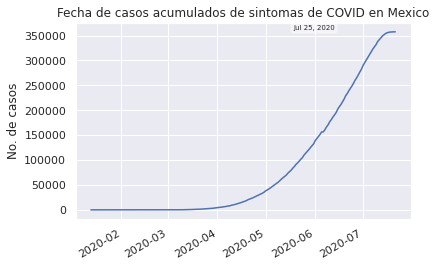

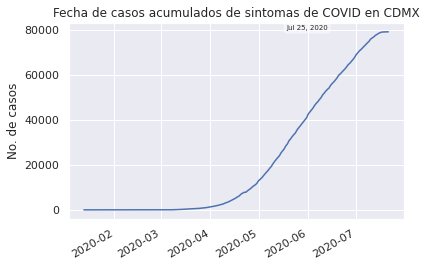

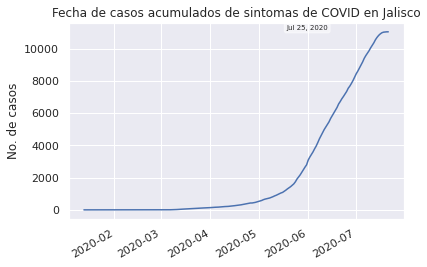

In [76]:
def casos_acum_indiv(titulo, columna_fecha, estado=None):
    if estado != None:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == None:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha]) #crea diccionario
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    #crear cumsum para acumulados
    fechas_total = fechas_total.cumsum(skipna=False)
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    plt.plot(fechas_total.index,fechas_total['casos'])
    plt.title(titulo)
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.savefig('plots/'+titulo+'.png', format='png', dpi=1200)
    #plt.close(fig)    
    return fechas_total
casos_acum_indiv(titulo="Fecha de casos acumulados de sintomas de COVID en Mexico",columna_fecha='FECHA_SINTOMAS')
casos_acum_indiv(titulo="Fecha de casos acumulados de sintomas de COVID en CDMX",columna_fecha='FECHA_SINTOMAS', estado=9)
casos_acum_indiv(titulo="Fecha de casos acumulados de sintomas de COVID en Jalisco",columna_fecha='FECHA_SINTOMAS',estado=14)

Se manda a llamar la funcion "casos_acum_indiv" con las 3 columnas de fechas para guardarlas en una sola gráfica

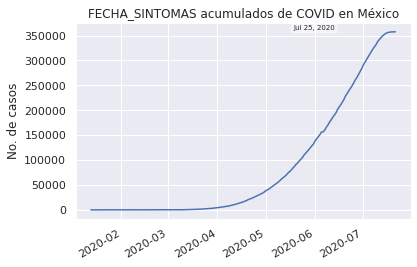

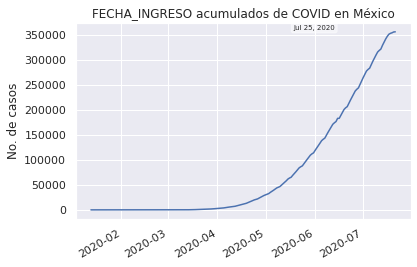

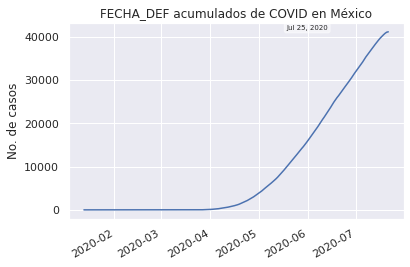

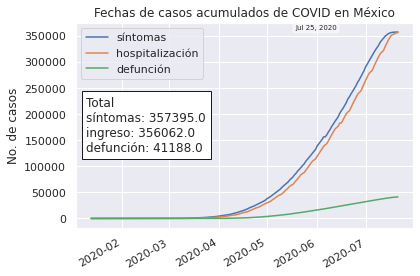

In [78]:
def casos_acum_total(estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las 3 columnas de fechas en df
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[-1:,0][0]) #guardar el ultimo valor de la columna
    #plot
    fig, ax = plt.subplots()
    texto="Total\nsíntomas: "+str(total_fechas[0])+"\ningreso: "+str(total_fechas[1])+"\ndefunción: "+str(total_fechas[2])
    anchored_text = AnchoredText(texto, loc="center left")
    ax.add_artist(anchored_text)
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos acumulados de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots/Fecha de casos acumulados de COVID en "+str(estado_str)+'.png', format='png', dpi=1200)
    #plt.close(fig)
casos_acum_total(estado=None, estado_str='México')
#casos_acum_total(estado=9, estado_str='CDMX')
#casos_acum_total(estado=14, estado_str='Jalisco')
#casos_acum_total(estado=22, estado_str='Queretaro')


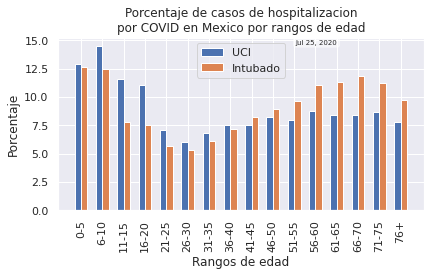

In [80]:
def grafica17():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,max(df['EDAD'])], 
                              labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76+'])
    labels = df['edad_rango'].cat.categories.tolist()
    hosp_rate, uci_rate, vent_rate = [],[],[]
    for i in range(len(labels)):
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        uci_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.UCI == 1)]))
        vent_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #posiciones de labels
    width = 0.3 #ancho de las barras
    fig, ax = plt.subplots()
    #se calcula el procentaje respecto a covid_rate
    uci_percentage = [ uci_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    vent_percentage = [ vent_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    #se grafican las barras
    ax.bar(x -width/2, uci_percentage, width, label="UCI")
    ax.bar(x +width/2, vent_percentage, width, label="Intubado")
    #grafica
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Rangos de edad")
    ax.set_title("Porcentaje de casos de hospitalizacion\npor COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.set_xticklabels(labels)
    ax.legend()
    plot_date(ax)
    fig.tight_layout()
    plt.savefig("plots/Porcentaje de casos de hospitalizacion por COVID en Mexico por rangos de edad.png", format='png', dpi=1200)
    #plt.close(fig)
grafica17()

No handles with labels found to put in legend.


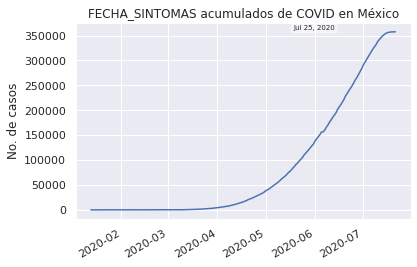

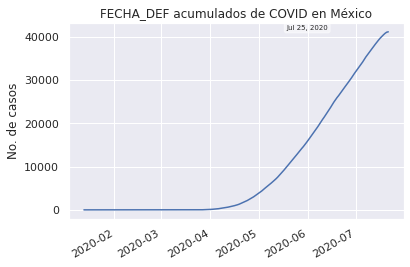

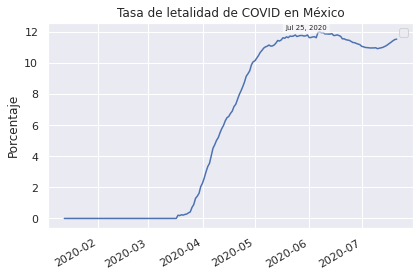

In [84]:
def mort_porcentaje(estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las columnas de fechas en df
    for i in range(2):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
    mort_porcentaje = [ df_fechas_mex.iloc[:,1][i]/df_fechas_mex.iloc[:,0][i]*100 for i in range(len(df_fechas_mex.iloc[:,0])) ]
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    ax.plot(df_fechas_mex.index,mort_porcentaje)
    plt.title("Tasa de letalidad de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Porcentaje")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots/Tasa de letalidad de COVID en "+str(estado_str)+'.png', format='png', dpi=1200)
    #plt.close(fig)
mort_porcentaje(estado=None, estado_str='México')
#mort_porcentaje(estado=9, estado_str='CDMX')

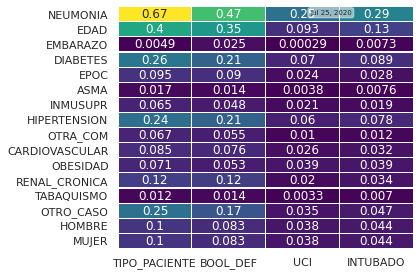

In [86]:
#MATRIZ CORRELACION
def mat_corr():
    #hacer columna de hombre y de mujer para reemplazar sexo
    data_matcorr = df.copy()
    data_matcorr['HOMBRE'] = ~data_matcorr['SEXO']
    data_matcorr['HOMBRE'] = data_matcorr['HOMBRE'].replace([-2], 0)
    data_matcorr['HOMBRE'] = data_matcorr['HOMBRE'].abs()
    data_matcorr['MUJER'] = data_matcorr['SEXO'][data_matcorr['SEXO'] == 1]
    data_matcorr['MUJER'] = data_matcorr['MUJER'].replace([np.NaN], 0)
    data_matcorr = data_matcorr.loc[:,['NEUMONIA','EDAD','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO','HOMBRE','MUJER','TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']]
    df1 = data_matcorr.corr()[['TIPO_PACIENTE']] 
    df2 = data_matcorr.corr()[['BOOL_DEF']] 
    df3 = data_matcorr.corr()[['UCI']] 
    df4 = data_matcorr.corr()[['INTUBADO']] 
    df_matcorr = df1.join(df2, how='outer')
    df_matcorr = df_matcorr.join(df3, how='outer')
    df_matcorr = df_matcorr.join(df4, how='outer')
    df_matcorr = df_matcorr.drop(index=(['TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']))
    df_matcorr = df_matcorr.abs()
    fig, ax = plt.subplots()
    sns.heatmap(df_matcorr, 
                annot=True, 
                linewidths=0.1, 
                linecolor='white',
                cbar=False,
                cmap='viridis')
    plot_date(ax)
    fig.tight_layout()
    fig.savefig('plots/corrmatrix_1.png', format='png', dpi=1200)
    #plt.close(fig)
mat_corr()